### Run graph cut reimplementation from scratch use ford fulkerson algorithm

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from graph_cut.graphcut_reimplementation.graphcut import GraphCut
from matplotlib import pyplot as plt

Maximum Flow:  10
Minimum Cut Nodes:  [ True False False False  True  True  True False False]


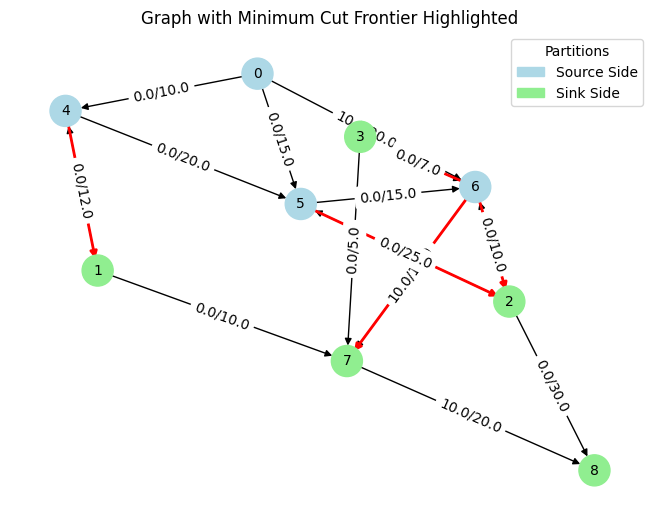

In [6]:
g = GraphCut(9)  # 4 nodes in the first partition (0-3), 5 nodes in the second partition (4-8)

# Adding edges with varying capacities between the two partitions
g.add_edge(0, 4, 10)  # From node 0 to node 4
g.add_edge(0, 5, 15)  # From node 0 to node 5
g.add_edge(0, 6, 20)  # From node 0 to node 6
g.add_edge(1, 4, 12)  # From node 1 to node 4
g.add_edge(1, 7, 10)  # From node 1 to node 7
g.add_edge(2, 5, 25)  # From node 2 to node 5
g.add_edge(2, 6, 10)  # From node 2 to node 6
g.add_edge(2, 8, 30)  # From node 2 to node 8
g.add_edge(3, 6, 7)   # From node 3 to node 6
g.add_edge(3, 7, 5)   # From node 3 to node 7

# Additional edges within the second partition (edges between nodes in partition 2)
g.add_edge(4, 5, 20)  # From node 4 to node 5
g.add_edge(5, 6, 15)  # From node 5 to node 6
g.add_edge(6, 7, 10)  # From node 6 to node 7
g.add_edge(7, 8, 20)

# Define source and sink
source = 0
sink = 8

# Find maximum flow and minimum cut
max_flow = g.ford_fulkerson(source, sink)
min_cut_nodes = g.min_cut()

print("Maximum Flow: ", max_flow)
print("Minimum Cut Nodes: ", min_cut_nodes)

# Visualize the graph and highlight min-cut
g.display_graph_and_min_cut()

Maximum Flow:  24
Minimum Cut Nodes:  [ True  True  True  True  True  True  True  True  True  True  True False]


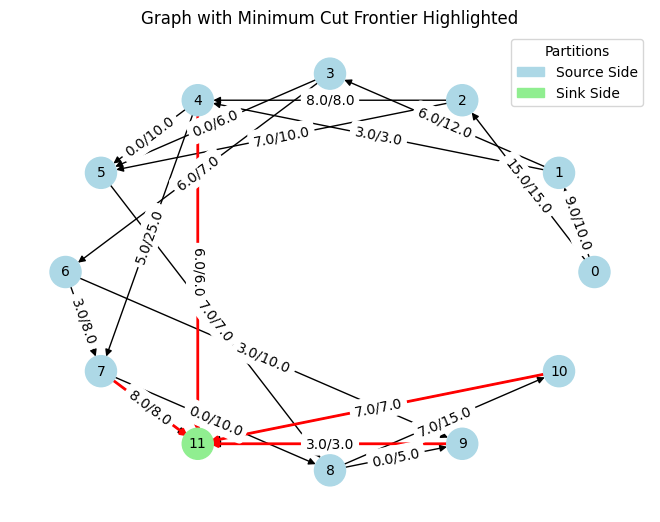

In [72]:
# Example usage with a more complex graph
g = GraphCut(12)

# Adding edges with varying capacities
g.add_edge(0, 1, 10)
g.add_edge(0, 2, 15)
g.add_edge(1, 3, 12)
g.add_edge(1, 4, 3)
g.add_edge(2, 5, 10)
g.add_edge(2, 4, 8)
g.add_edge(3, 6, 7)
g.add_edge(4, 5, 10)
g.add_edge(4, 7, 25)
g.add_edge(5, 8, 7)
g.add_edge(6, 9, 10)
g.add_edge(7, 8, 10)
g.add_edge(8, 9, 5)
g.add_edge(8, 10, 15)
g.add_edge(9, 11, 3)
g.add_edge(10, 11, 7)
g.add_edge(6, 7, 8)
g.add_edge(7,11,8)
g.add_edge(4, 11, 6)
g.add_edge(3, 5, 6)

# Define source and sink
source = 0
sink = 11

# Find maximum flow and minimum cut
max_flow = g.ford_fulkerson(source, sink)
min_cut_nodes = g.min_cut(source)

print("Maximum Flow: ", max_flow)
print("Minimum Cut Nodes: ", min_cut_nodes)

# Visualize the graph and highlight min-cut
g.display_graph_and_min_cut(source, sink)


Maximum Flow:  23
Minimum Cut Nodes:  [ True  True  True False  True False]


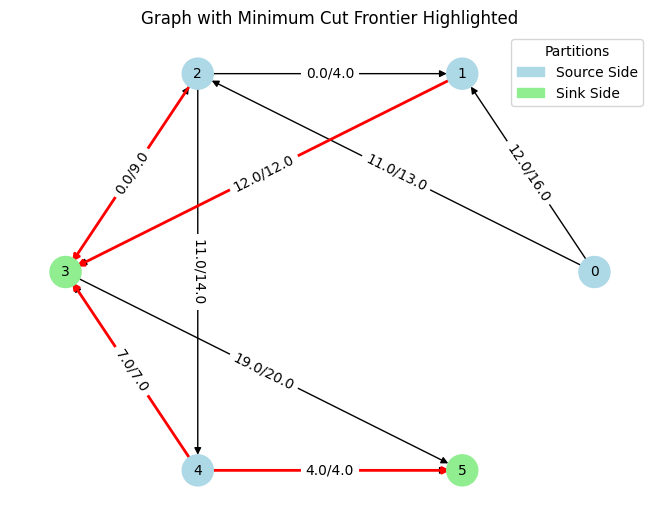

In [73]:
# Example usage 2 (small graph to display result)
g = GraphCut(6)
g.add_edge(0, 1, 16)
g.add_edge(0, 2, 13)
g.add_edge(1, 2, 10)
g.add_edge(1, 3, 12)
g.add_edge(2, 1, 4)
g.add_edge(2, 4, 14)
g.add_edge(3, 2, 9)
g.add_edge(3, 5, 20)
g.add_edge(4, 3, 7)
g.add_edge(4, 5, 4)

source = 0
sink = 5
max_flow = g.ford_fulkerson(source, sink)
min_cut_nodes = g.min_cut(source)

print("Maximum Flow: ", max_flow)
print("Minimum Cut Nodes: ", min_cut_nodes)
g.display_graph_and_min_cut(source, sink)

In [11]:
# Example usage 1 (large graph)
width = 1000
height = 1000
g = GraphCut(width*height)
for i in range(width-1):
    for j in range(height-1):
      node = i*height + j
      g.add_edge(node, node+1, np.random.randint(1,9))
      g.add_edge(node, node+width, np.random.randint(1,9))

source = 0
sink = 1000000-2
max_flow = g.ford_fulkerson(source, sink)

min_cut_nodes = g.min_cut(source)

max_flow

3

### How to use the SegmentationDataset ?

In [12]:
!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [13]:
from load_segmentation_dataset import SegmentationDataset

dataset =SegmentationDataset( classes = ["sheep", "cow", "elephant"], nb_samples= 30, resize_factor=0.5)
dataset.prepare_dataset()


Found annotations at '/raid/home/bournez_pie/fiftyone/coco-2017/raw/instances_val2017.json'


Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation-30'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


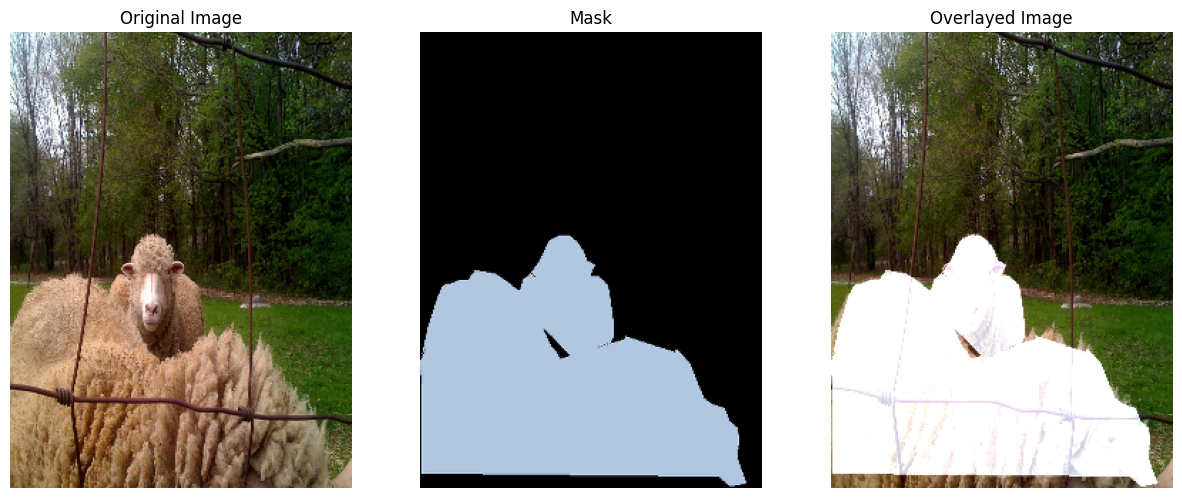

In [14]:
dataset.display_sample(10)

In [15]:
img, mask, labels = dataset.__getitem__(10)
labels

['sheep']

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from load_segmentation_dataset import SegmentationDataset

dataset =SegmentationDataset( classes = ["airplane", "elephant","laptop"], nb_samples= 30, resize_factor=0.5)
dataset.prepare_dataset()


Found annotations at '/raid/home/bournez_pie/fiftyone/coco-2017/raw/instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation-30'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


<bound method SegmentationDataset.get_segmentation_mask of <load_segmentation_dataset.SegmentationDataset object at 0x7f7abd710590>>

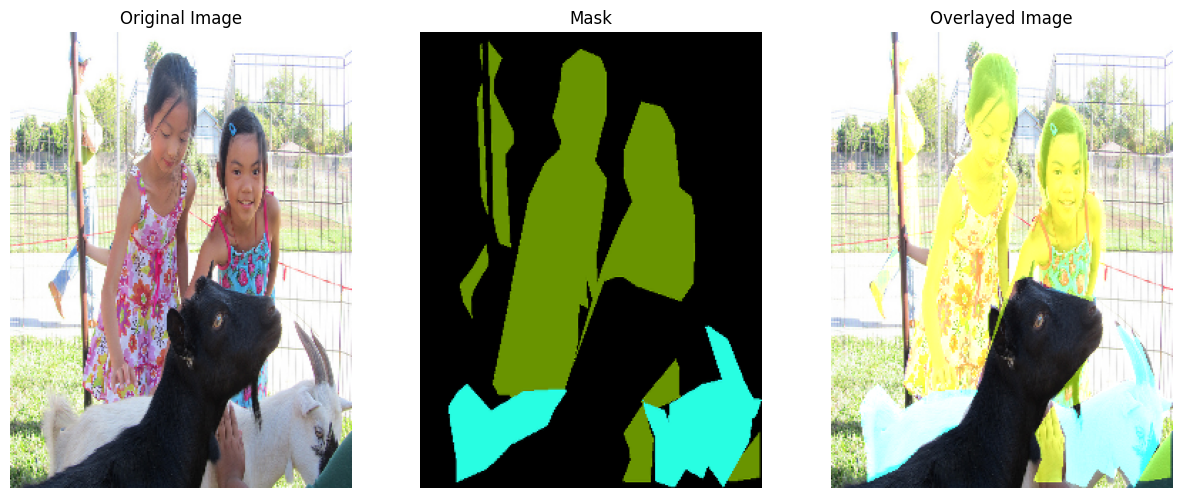

In [18]:
dataset.display_sample(4)

In [19]:
np

<module 'numpy' from '/raid/home/bournez_pie/anaconda3/envs/mva_sat/lib/python3.13/site-packages/numpy/__init__.py'>

In [20]:
# get the different unique value of mask along the r g b axis

mask = mask.astype(np.uint8)
# mask = mask[:, :, 0]
np.unique(mask)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  51,  52,
        54,  55,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  83,
        84,  85,  86,  88,  89,  92,  93,  94,  95,  96,  97, 100, 102,
       104, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 19

In [46]:
def plot_energy(l_energy):
    plt.plot(l_energy)
    plt.xlabel('Iterations')
    plt.ylabel('Energy')
    plt.title('Energy vs Iterations')
    plt.show()



we segment the image into  5  classes


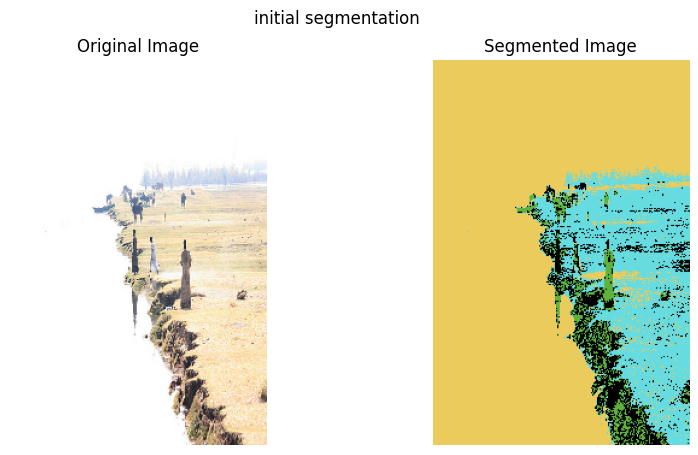

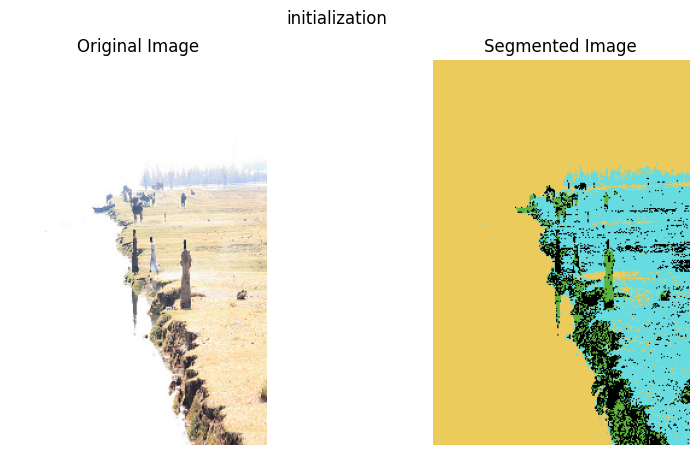

first energy 2742301.440560977
iterations nb: 0
alpha: 0
computed energy 304486.4683140471 is it greater than initial energy? False


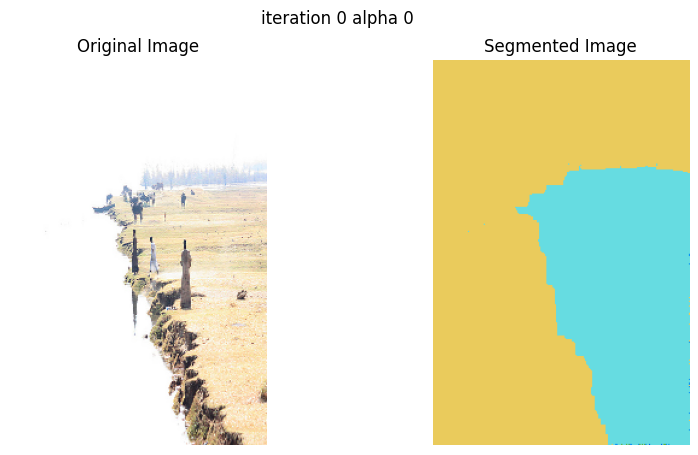

energy 304486.4683140471
alpha: 1
computed energy 304486.4683140471 is it greater than initial energy? False


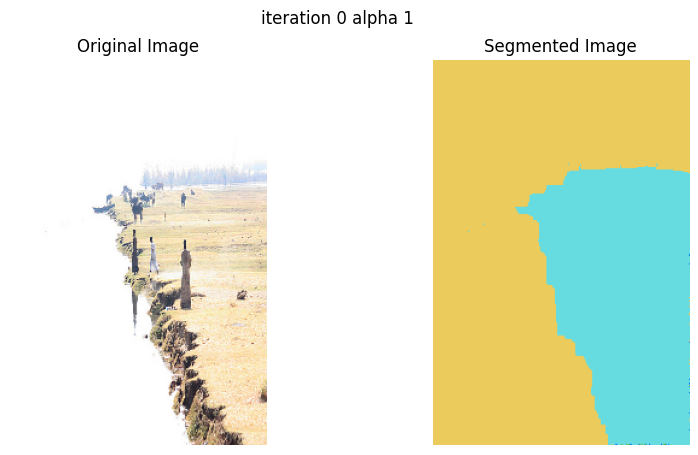

energy 304486.4683140471
alpha: 2
computed energy 294122.9368465708 is it greater than initial energy? False


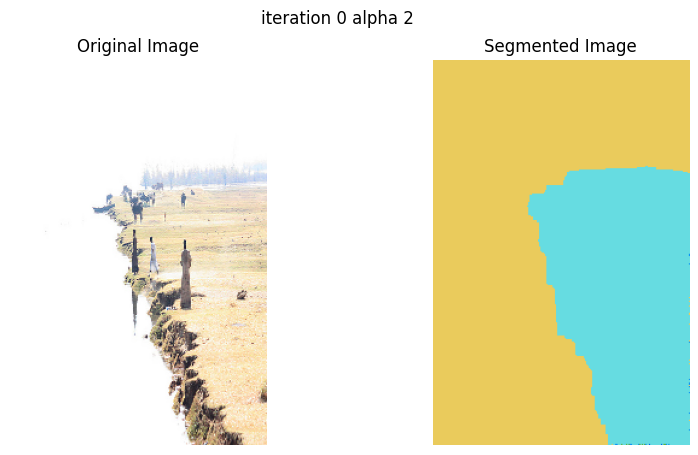

energy 294122.9368465708
alpha: 3
computed energy 294122.9368465708 is it greater than initial energy? False


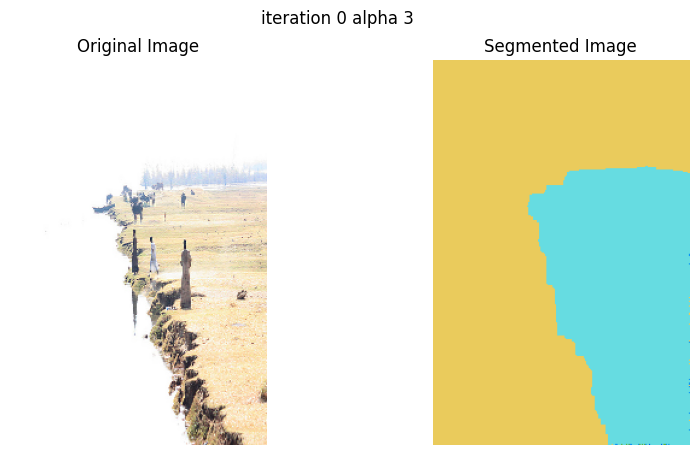

energy 294122.9368465708
alpha: 4
computed energy 294122.9368465708 is it greater than initial energy? False


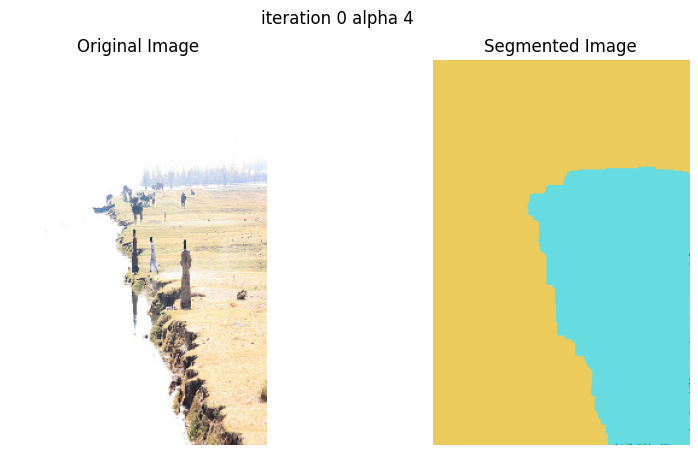

energy 294122.9368465708


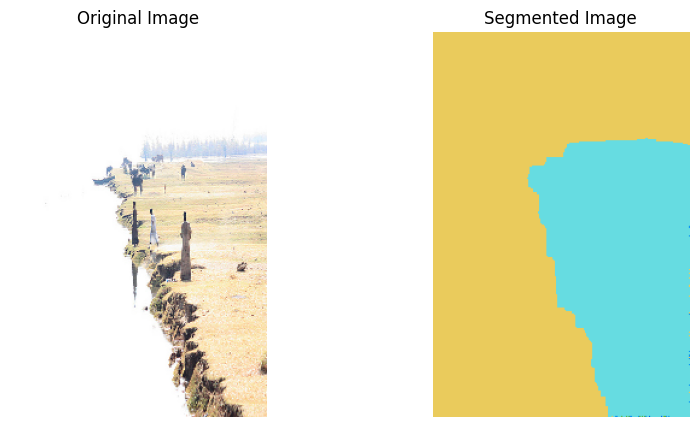

iterations nb: 1
alpha: 0
computed energy 294122.9368465708 is it greater than initial energy? False


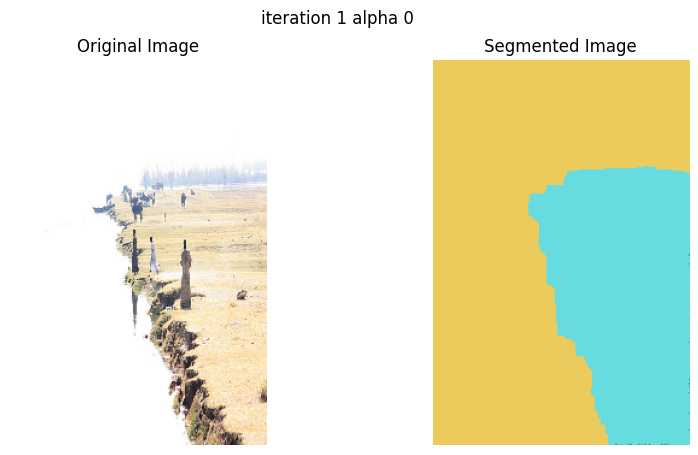

energy 294122.9368465708
alpha: 1
computed energy 294122.9368465708 is it greater than initial energy? False


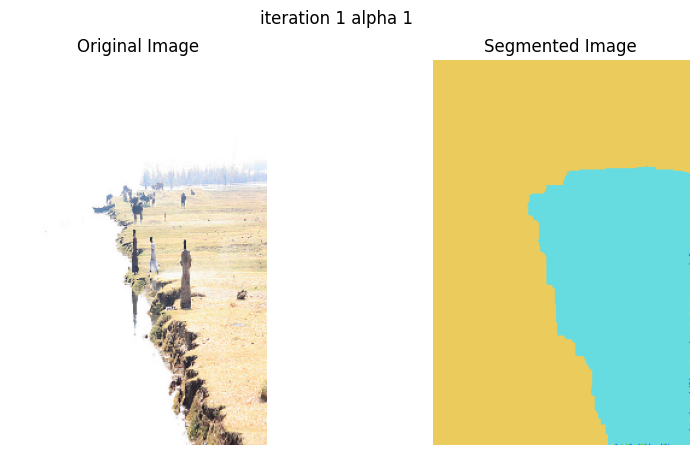

energy 294122.9368465708
alpha: 2
computed energy 294122.9368465708 is it greater than initial energy? False


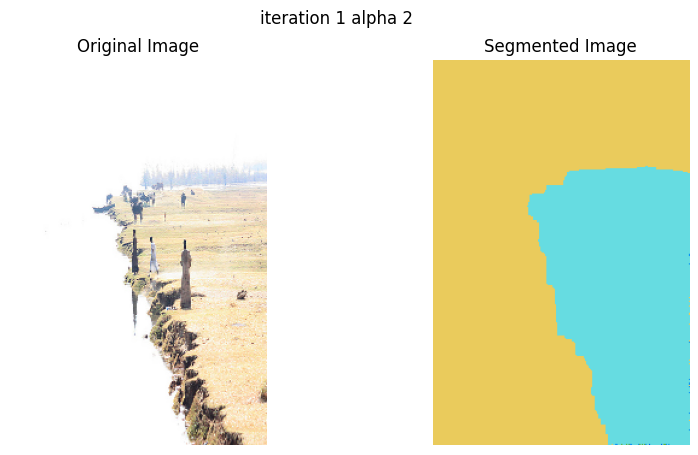

energy 294122.9368465708
alpha: 3
computed energy 294122.9368465708 is it greater than initial energy? False


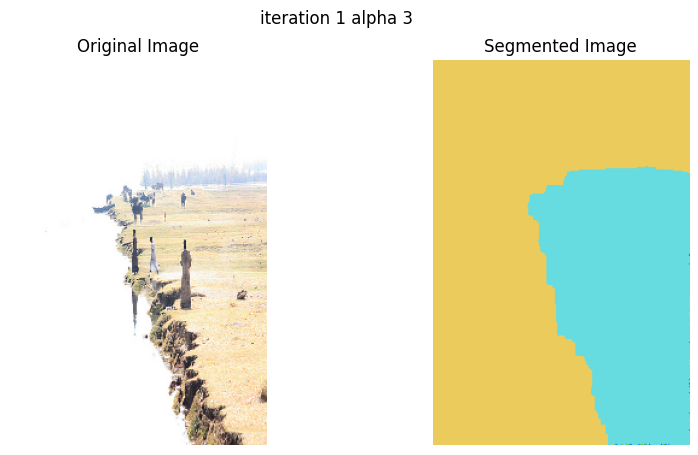

energy 294122.9368465708
alpha: 4
computed energy 294122.9368465708 is it greater than initial energy? False


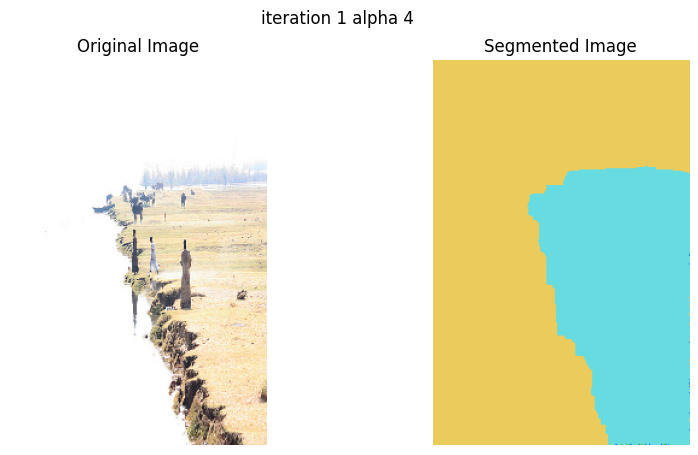

energy 294122.9368465708


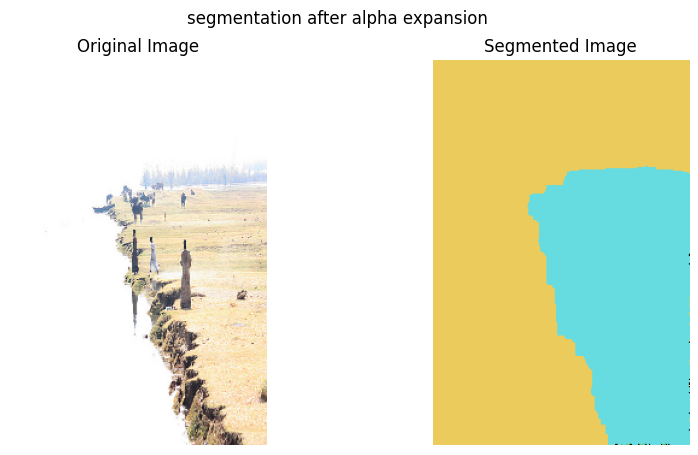

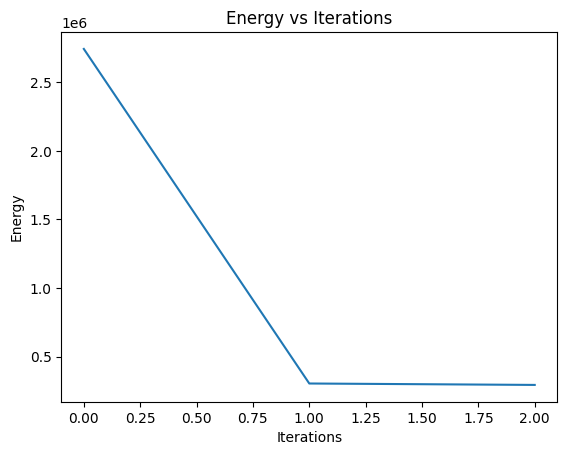

In [47]:
idx=[0,1,2,4]
K=3
from graph_cut import * 
for id in idx:
    image, mask, name_labels = dataset.__getitem__(id)
    
    K=len(np.unique(labels))
    print("we segment the image into ", K, " classes")

    labels = initialize_labels_bis(image, K=K, method='kmeans')
    show_segmentation(image, labels,title="initial segmentation")

    histograms = compute_histograms(image, labels, K=K, bins = 16)
    unary_term = compute_unary_term(image, labels,histograms, K=K, bins=16)
    pairwise_term = compute_pairwise_term(image, K=K, lambda_val=200)
    segmented_labels,l_energy = alpha_expansion(image, unary_term, pairwise_term,method='kmeans', K=K,max_iterations=2,return_energy=True)
    show_segmentation(image, segmented_labels,title="segmentation after alpha expansion")

    plot_energy(l_energy)    
    #! IoU can be too complex
    break 

In [31]:
dataset.LABEL_COLORS

{'boat': array([ 14, 149, 245], dtype=uint8),
 'cow': array([106, 244,  99], dtype=uint8),
 'elephant': array([ 71, 212, 153], dtype=uint8),
 'person': array([188, 174,  65], dtype=uint8),
 'sheep': array([ 20,  44, 203], dtype=uint8),
 'sports ball': array([102, 214, 240], dtype=uint8),
 'zebra': array([121,  24,  34], dtype=uint8),
 'giraffe': array([210,  65, 239], dtype=uint8),
 'bench': array([214, 244, 151], dtype=uint8),
 'train': array([ 74, 145, 222], dtype=uint8),
 'bird': array([202,  85, 145], dtype=uint8),
 'bowl': array([ 87, 184, 189], dtype=uint8),
 'horse': array([116, 237, 109], dtype=uint8)}

In [ ]:
# COLORS=dataset.LABEL_COLORS
# def compute_iou(
#     segmentation: np.ndarray,
#     mask: np.ndarray,
#     labels,
# ) -> float:
#     """
#     Compute Intersection over Union metric
#     :param segmentation: array, predicted segmentation
#     :param mask: array, ground truth segmentation
#     :param n_labels: int, number of labels
#     :return: float, Ious
#     """
#     iou = 0
#     for name in name_labels:
#         # n_labels being the number of objects that are not background
#         color = COLORS[name]
#         print("color",color)
#         print(np.all(segmentation == color, axis=-1))
#         indices_segmentation = np.where(np.all(segmentation == color, axis=-1))
#         coordinates_segmentation = set(
#             zip(indices_segmentation[0], indices_segmentation[1])
#         )

#         indices_mask = np.where(np.all(mask == color, axis=-1))
#         coordinates_mask = set(zip(indices_mask[0], indices_mask[1]))

#         intersection_length = len(
#             coordinates_segmentation.intersection(coordinates_mask)
#         )
#         union_length = len(coordinates_segmentation.union(coordinates_mask))
#         iou += intersection_length / union_length
#     return iou / (n_labels + 1)
# ious = []
# compute_iou(mask, mask,3)

color [ 14 149 245]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


ZeroDivisionError: division by zero